In [68]:
# importing libraries
import pandas as pd # for data proccessing
import numpy as np # for linear algebra
import matplotlib.pyplot as plt # visualization
import seaborn as sns


In [46]:
# read the dataset
df = pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')
# the first five rows of the dataset
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [69]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [48]:
df.sample(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
65,57,1,4,150,276,0,2,112,1,0.6,2,1,6,Presence
137,56,1,4,125,249,1,2,144,1,1.2,2,1,3,Presence
95,47,1,4,110,275,0,2,118,1,1.0,2,1,3,Presence
93,54,1,4,110,206,0,2,108,1,0.0,2,1,3,Presence
91,61,0,4,130,330,0,2,169,0,0.0,1,0,3,Presence
163,58,1,4,128,259,0,2,130,1,3.0,2,2,7,Presence
108,59,1,4,140,177,0,0,162,1,0.0,1,1,7,Presence
51,52,1,2,128,205,1,0,184,0,0.0,1,0,3,Absence
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence


# Data Preprocessing

In [49]:
# dataset shape & size
print(f" shape : {df.shape}")
print(f" size  : {df.size}")

 shape : (270, 14)
 size  : 3780


In [50]:
#checking if there is missing points
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [70]:
# basic summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [71]:
# basic stats
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [72]:
from sklearn.preprocessing import LabelEncoder 

In [73]:
# data transmission 
#categorical data into numerical data
encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
df['Heart Disease']=encoder.transform(df['Heart Disease'])

In [74]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<AxesSubplot: >

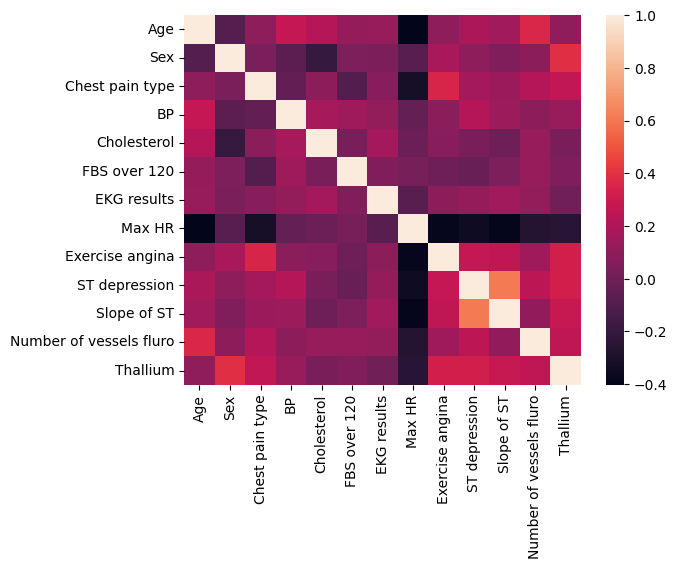

In [75]:
sns.heatmap(df.drop(columns='Heart Disease').corr())

<AxesSubplot: xlabel='Age', ylabel='Heart Disease'>

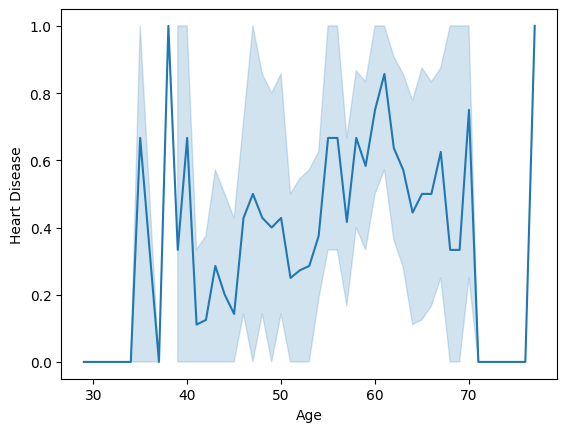

In [76]:
sns.lineplot(data=df,x='Age',y='Heart Disease')

<AxesSubplot: xlabel='Age', ylabel='Heart Disease'>

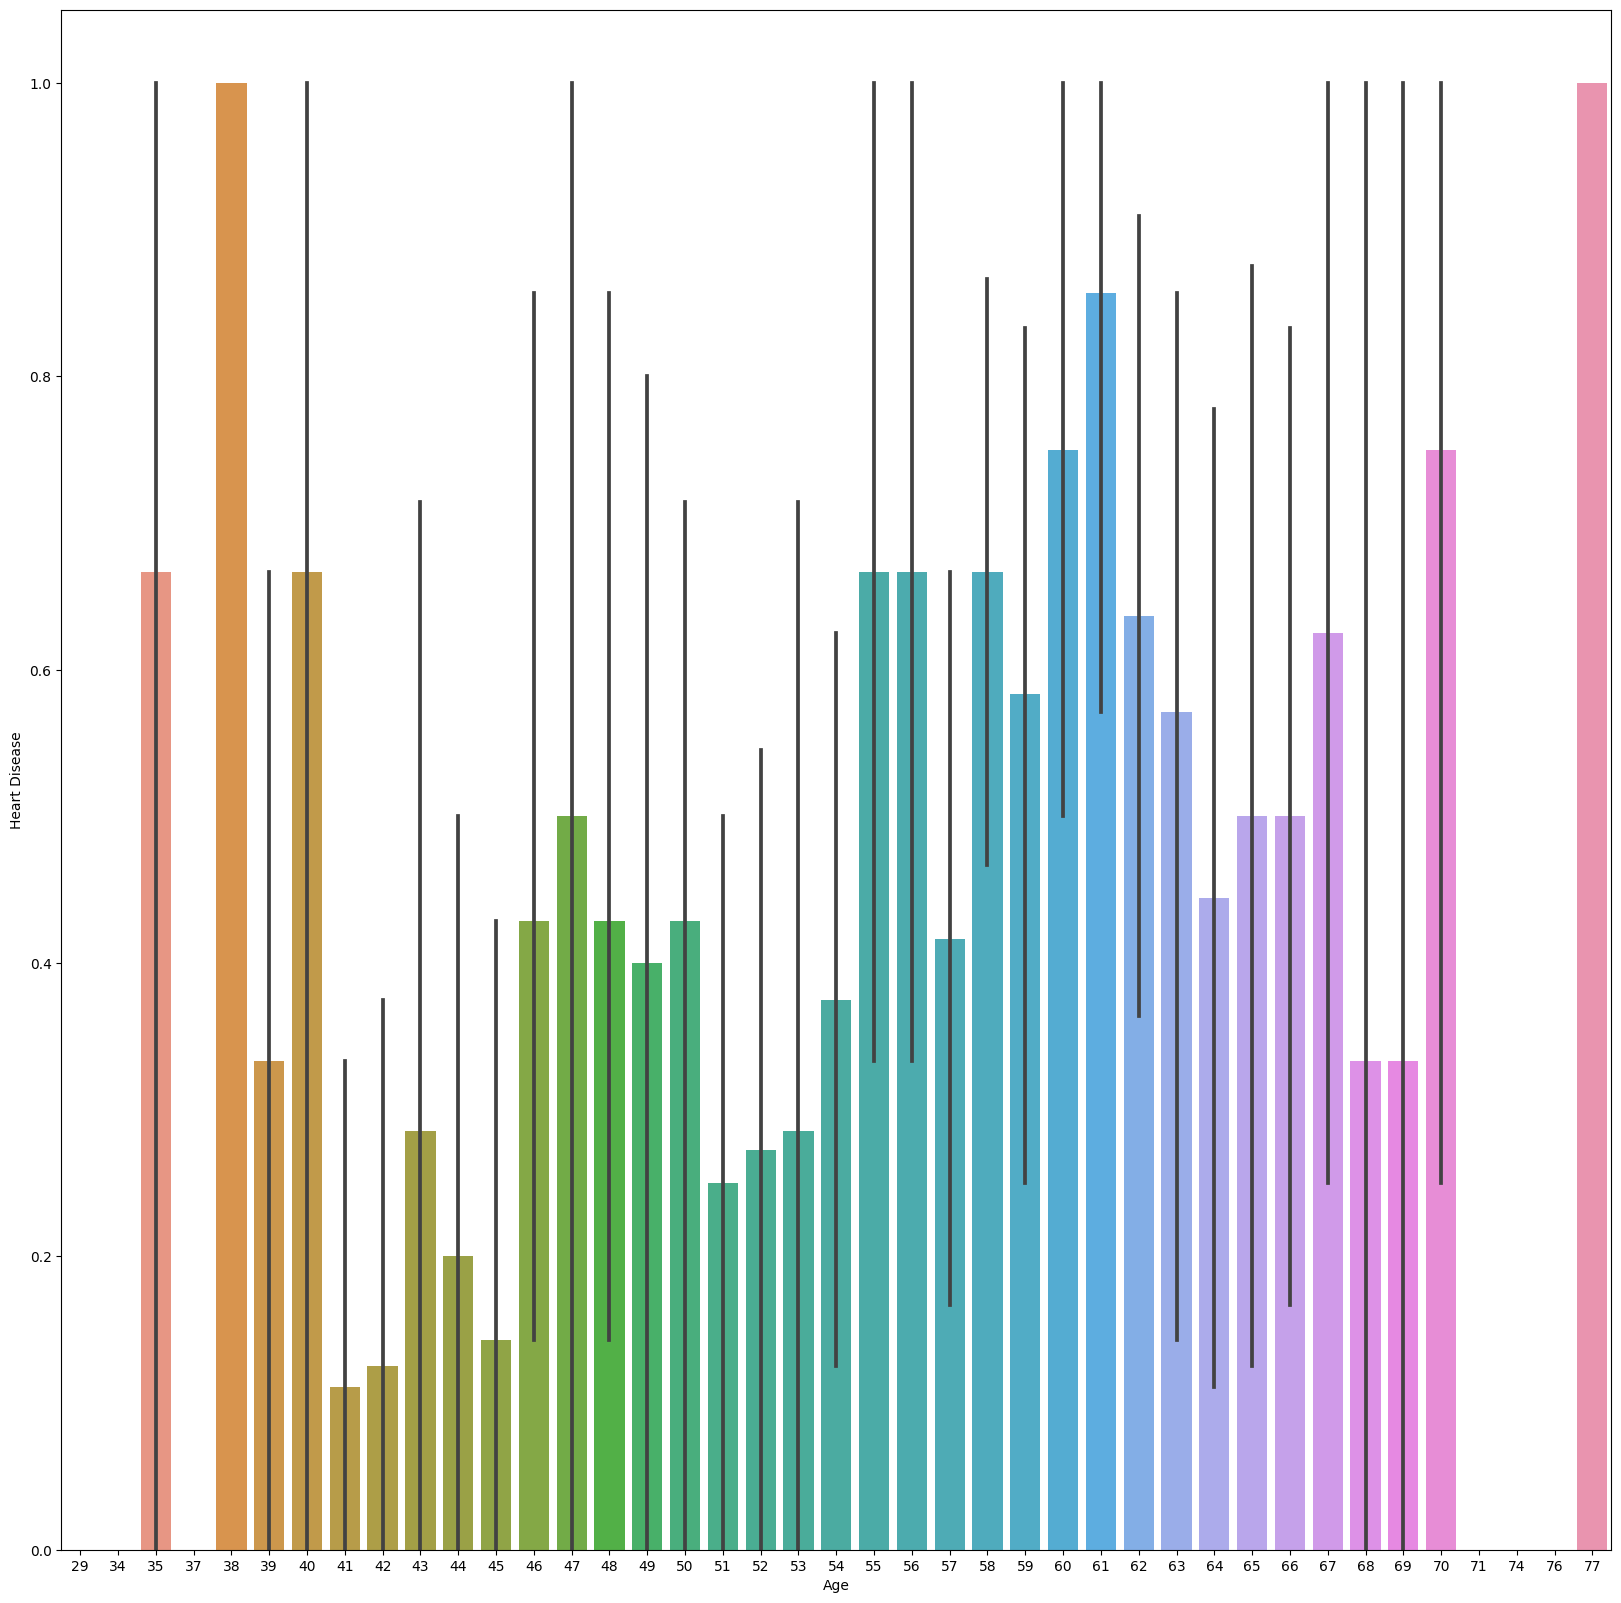

In [77]:
plt.figure(figsize=(20,20))
sns.barplot(data=df,y='Heart Disease',x='Age')

#  draw scatterplots

In [79]:
features = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']
target = 'Heart Disease'

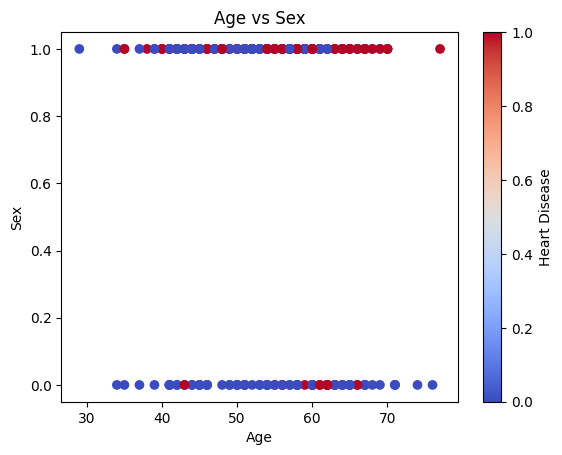

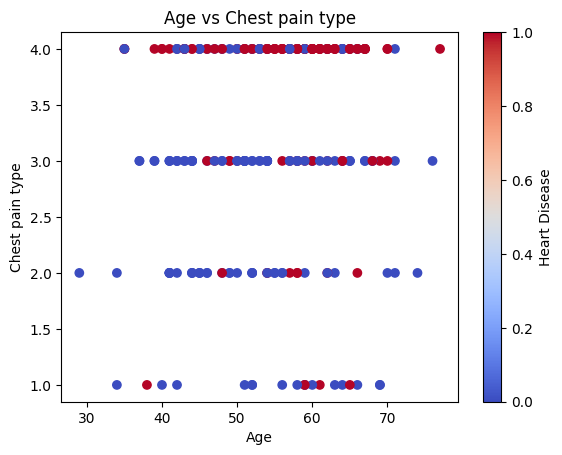

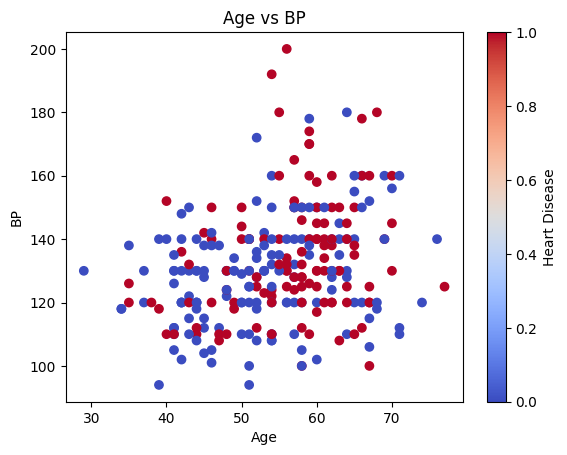

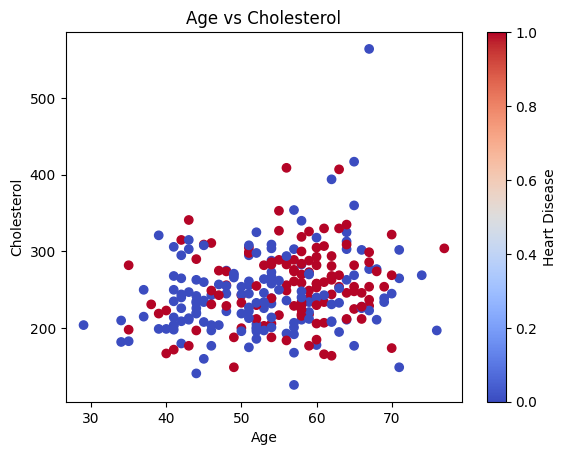

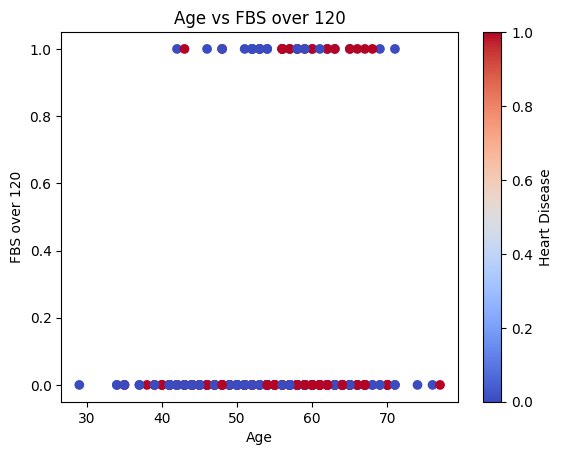

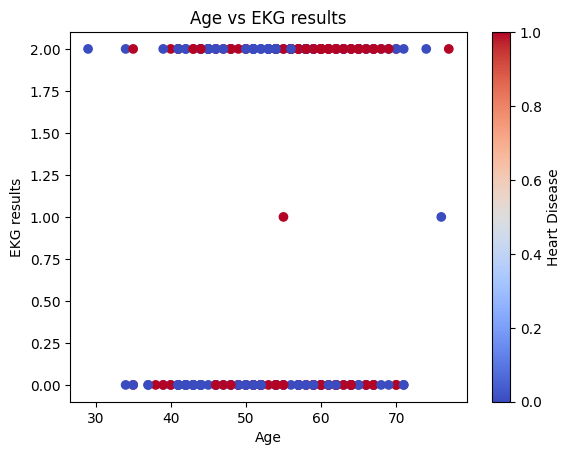

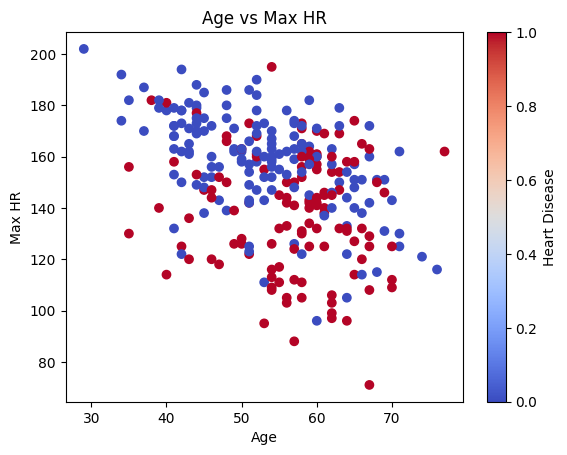

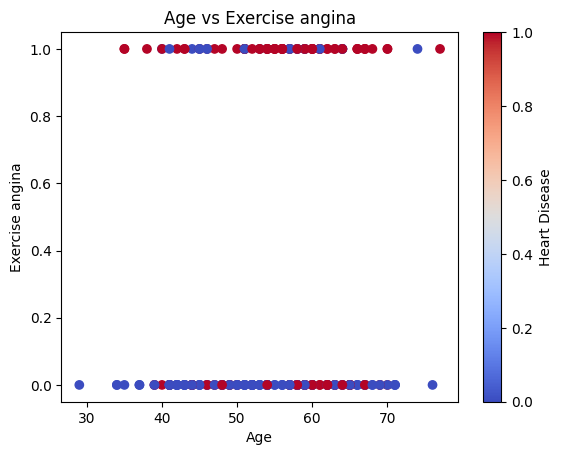

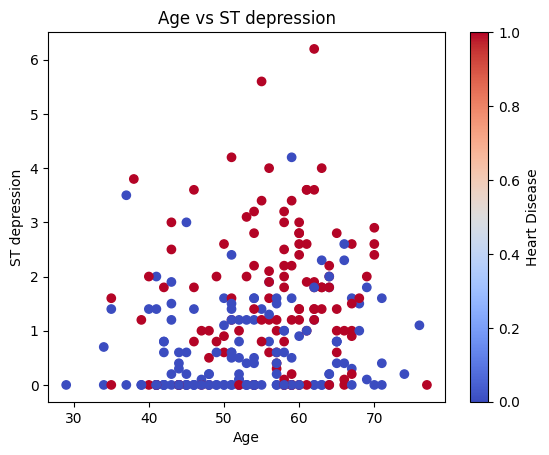

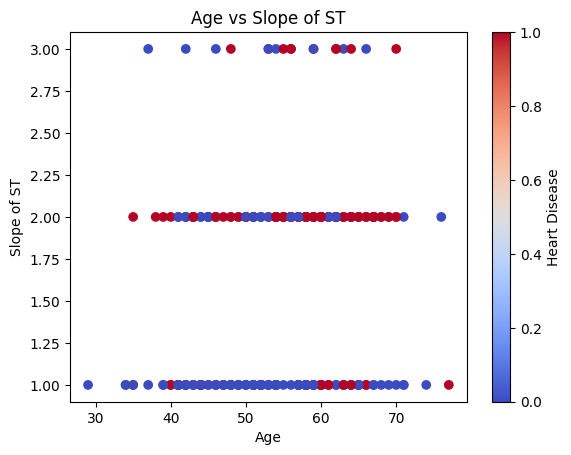

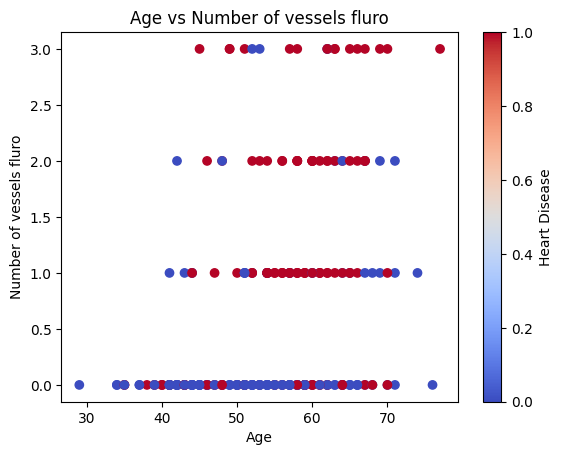

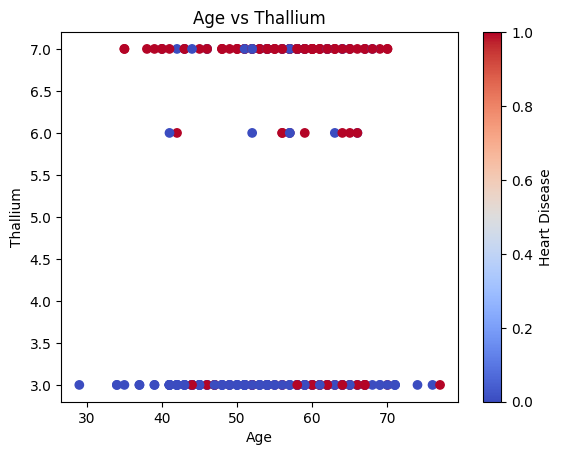

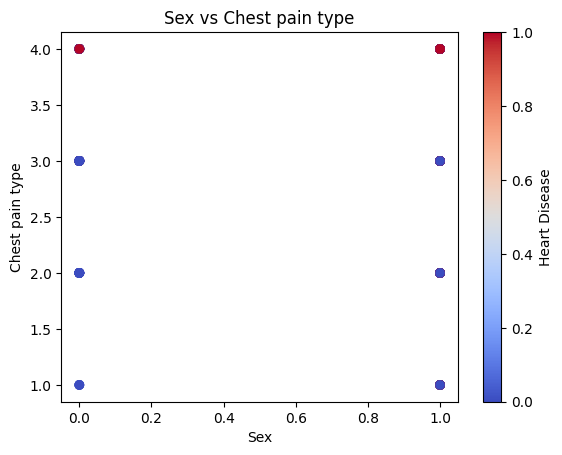

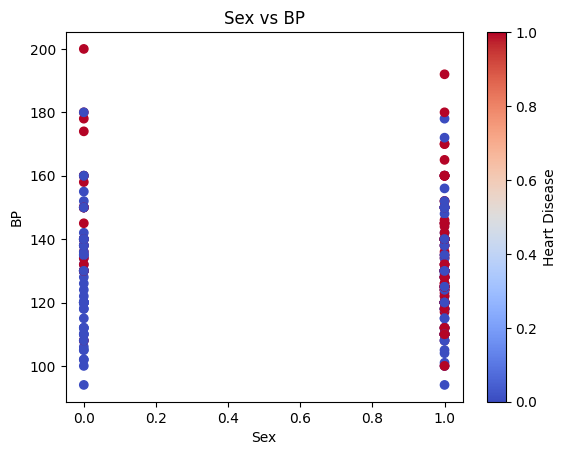

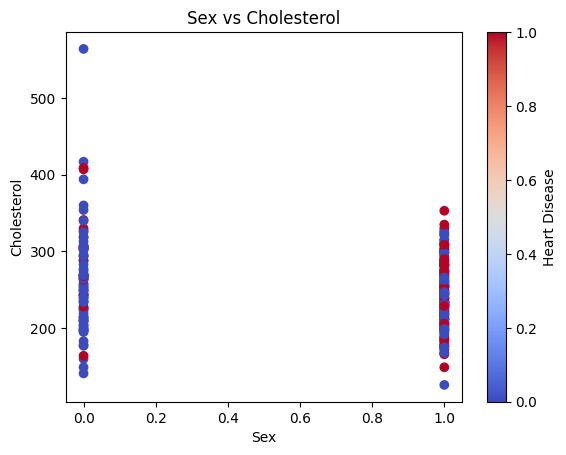

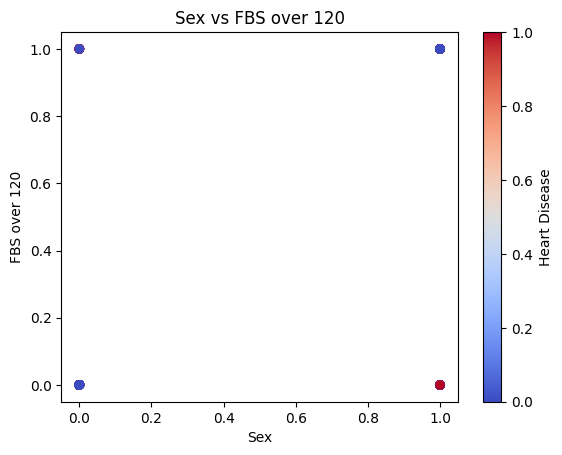

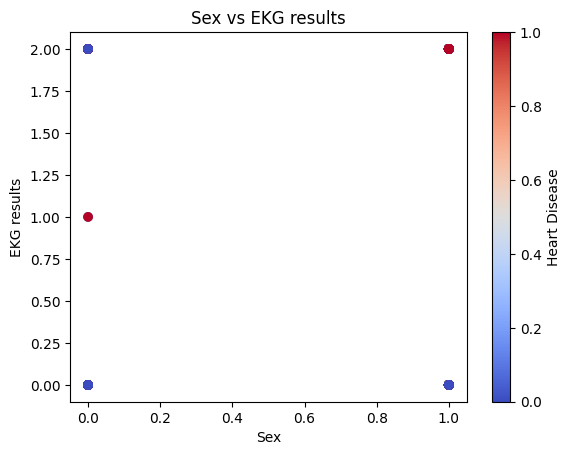

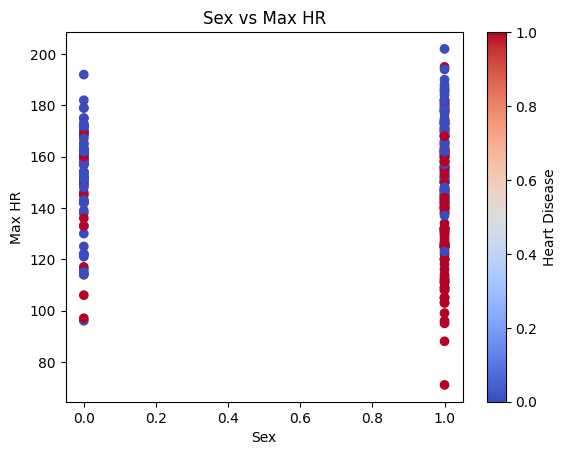

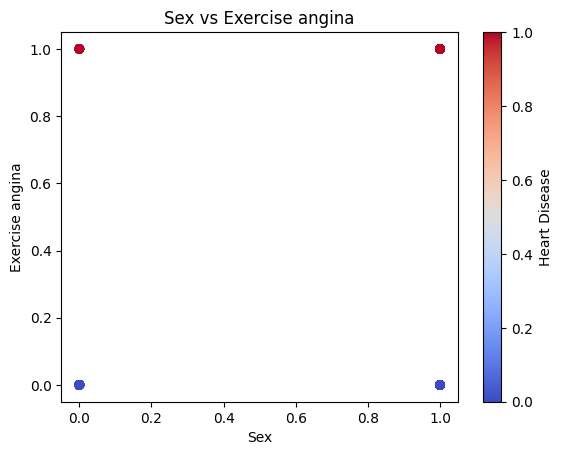

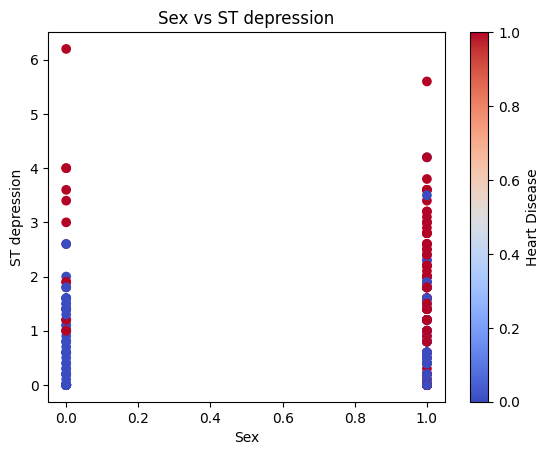

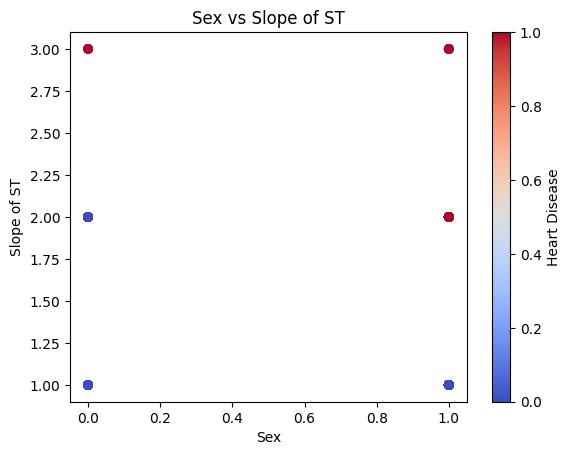

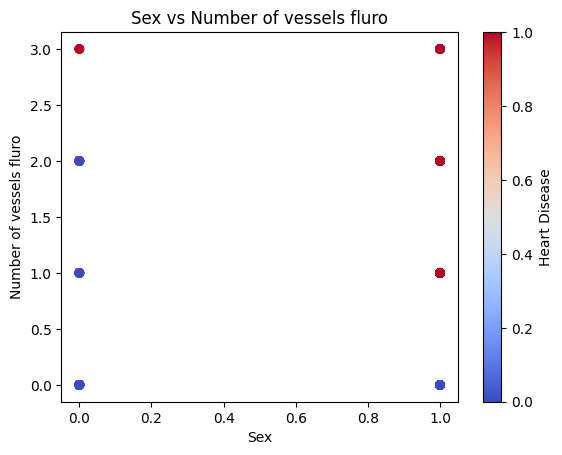

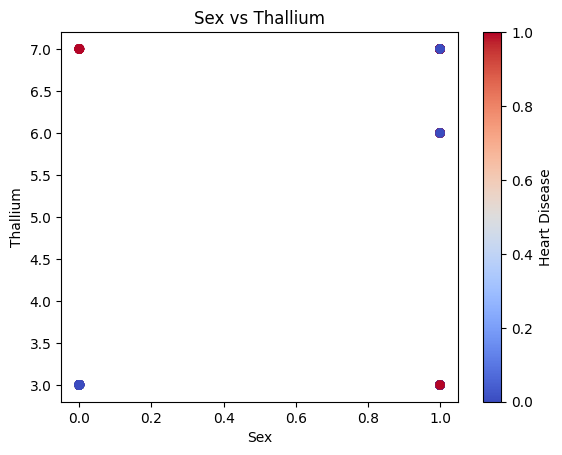

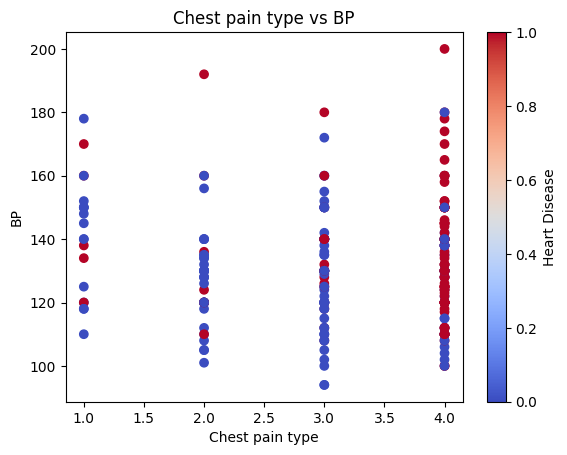

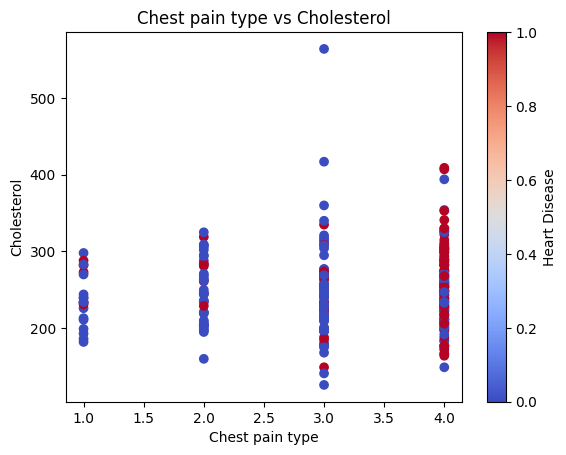

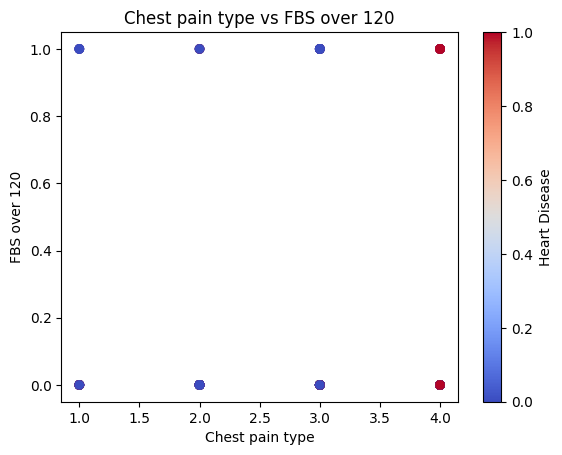

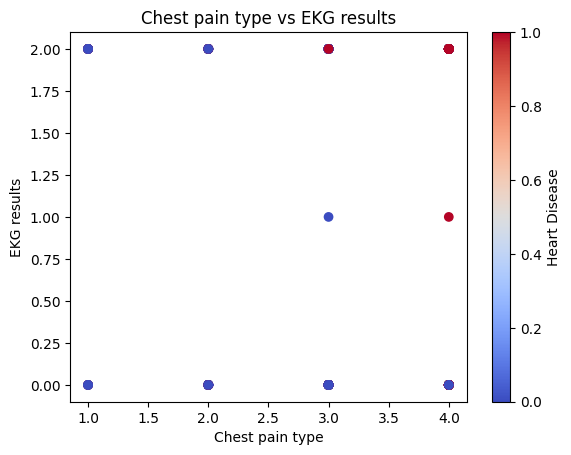

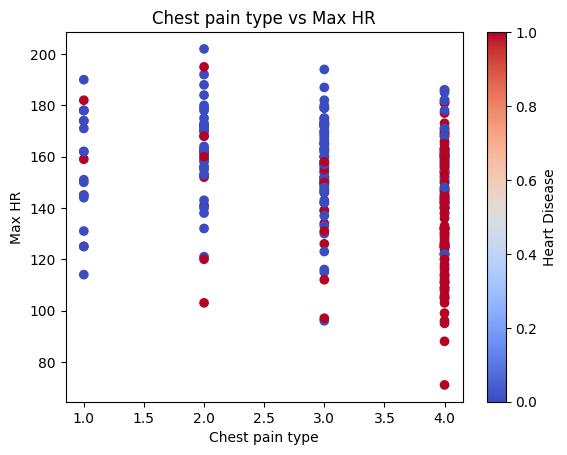

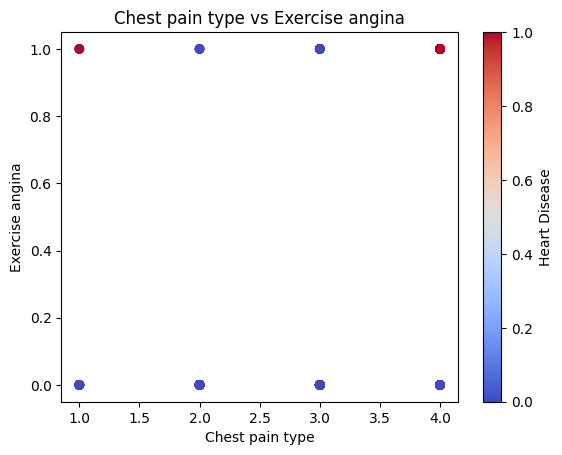

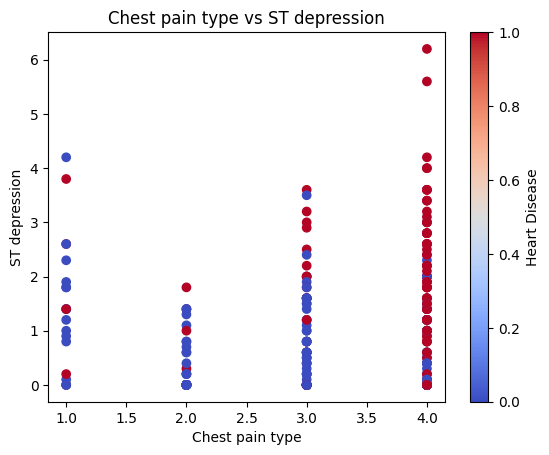

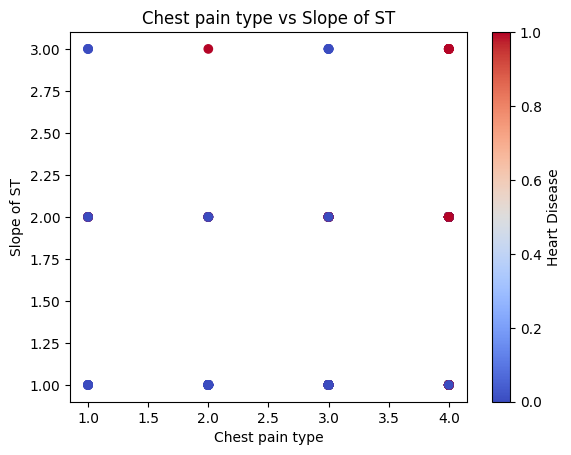

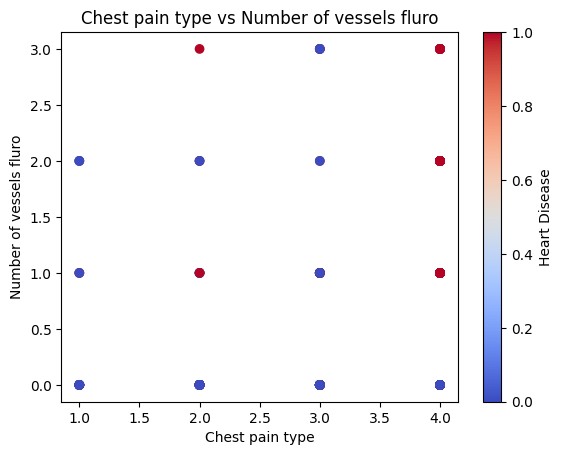

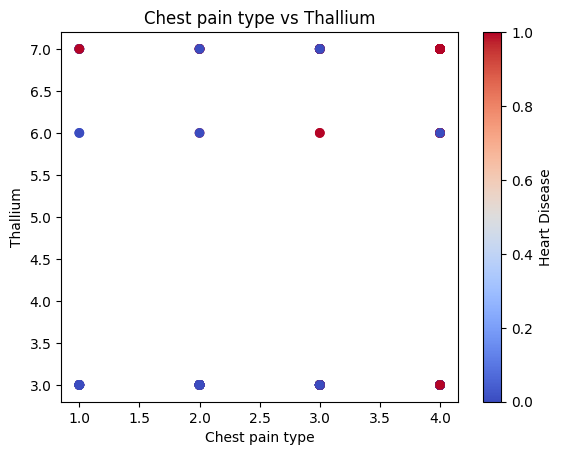

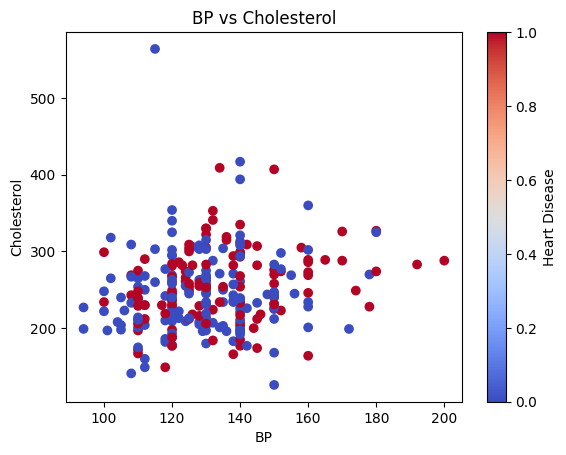

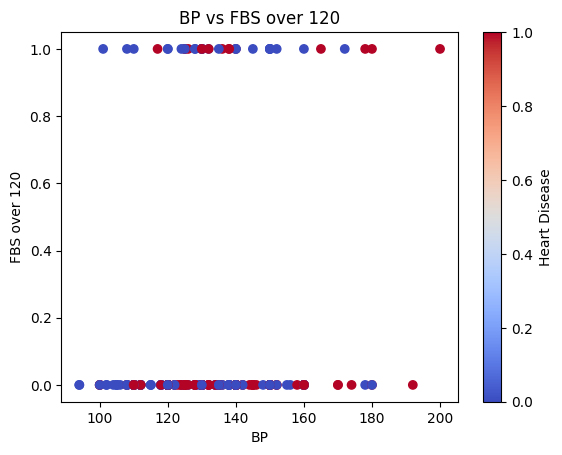

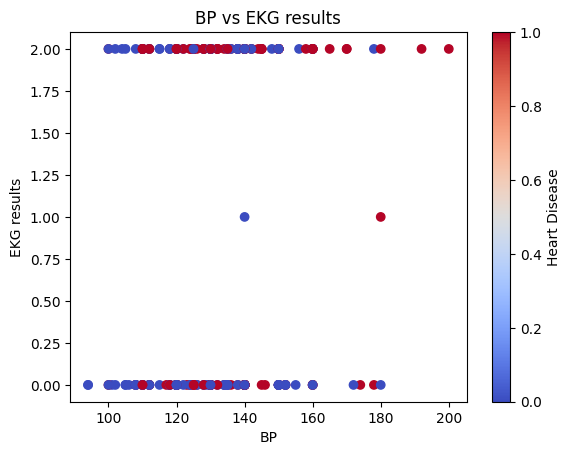

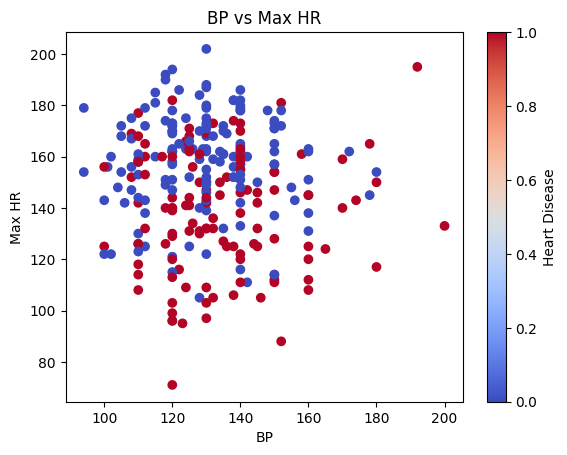

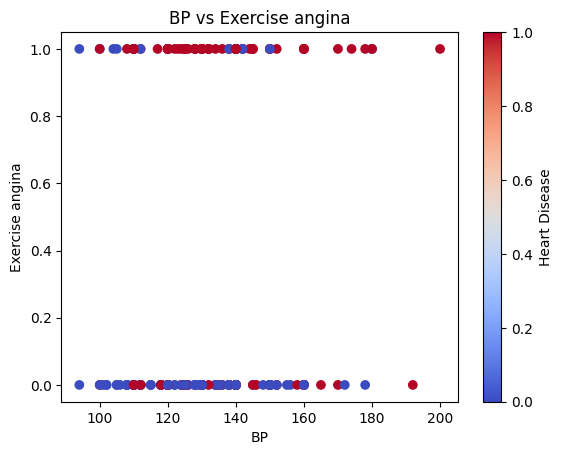

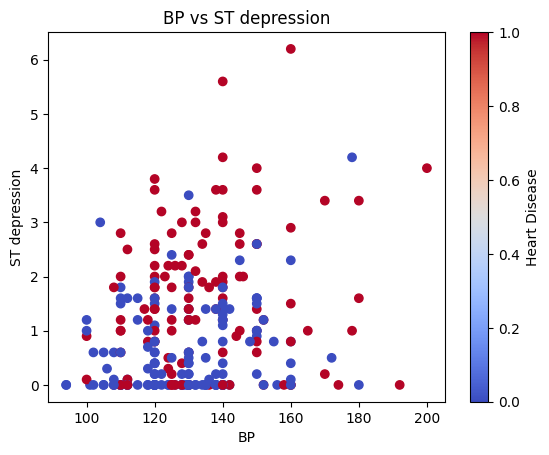

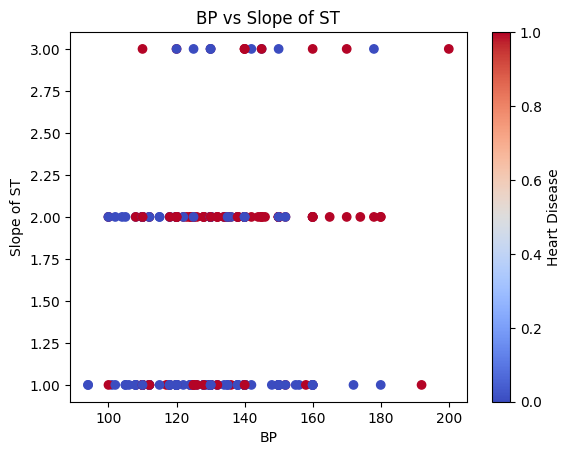

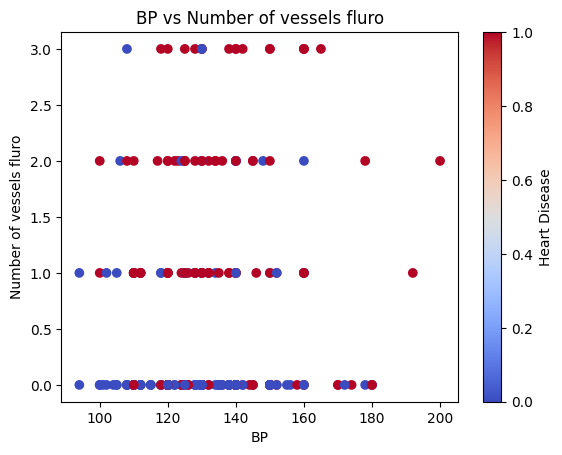

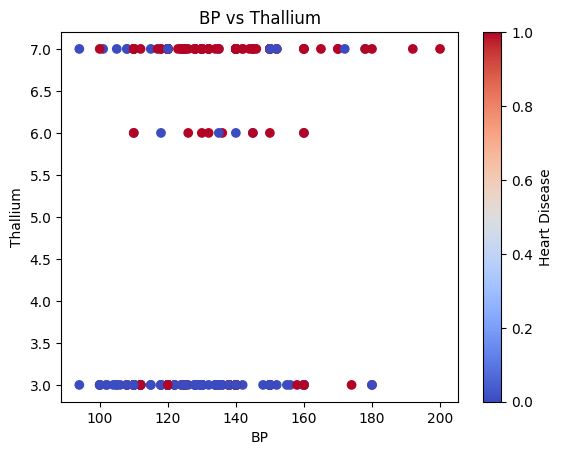

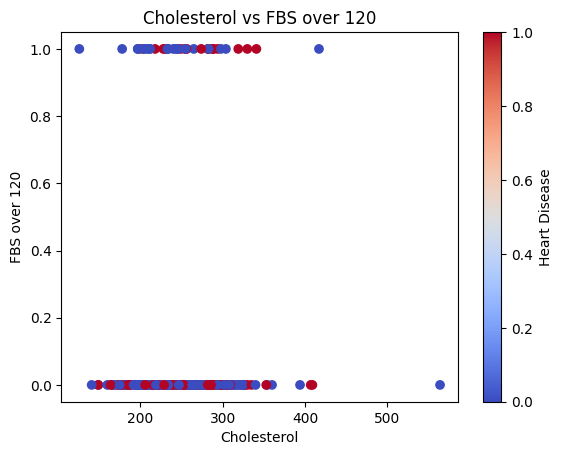

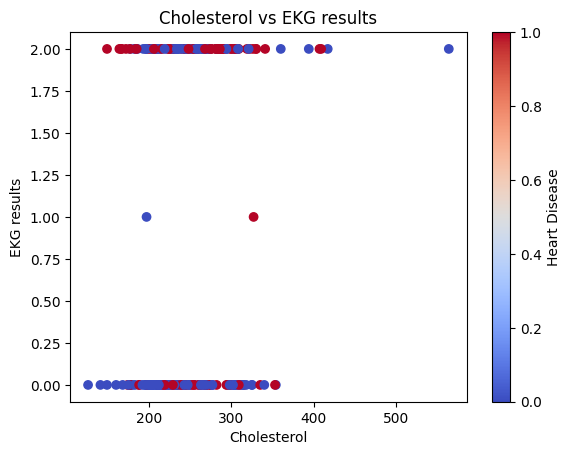

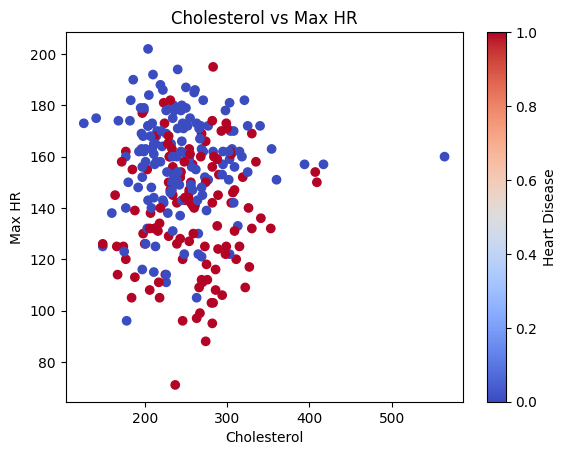

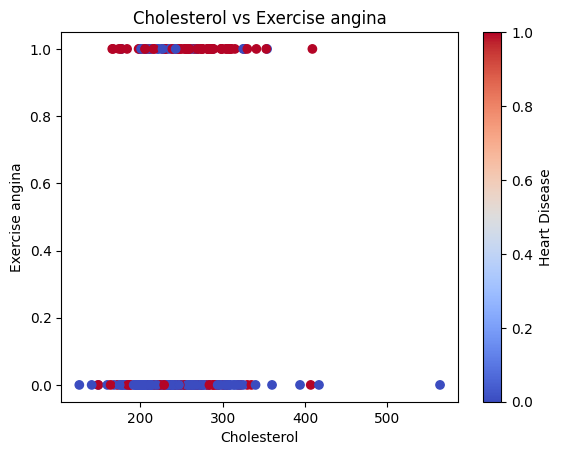

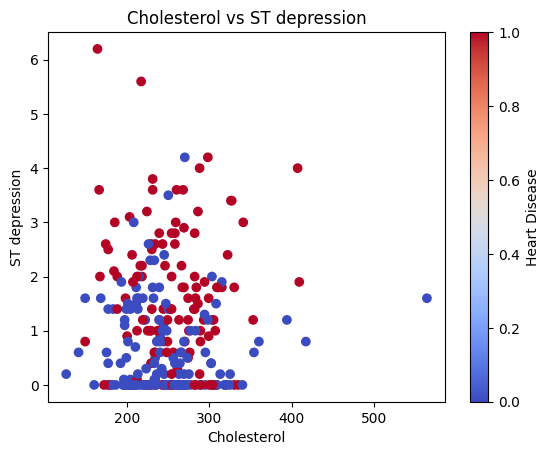

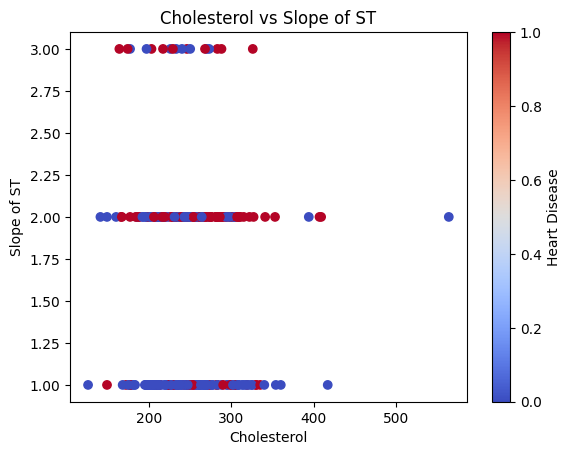

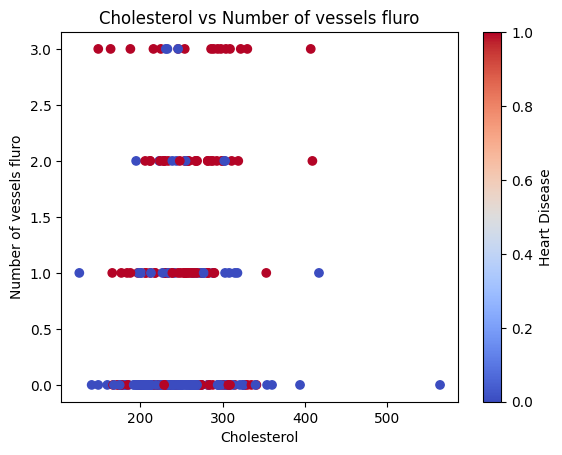

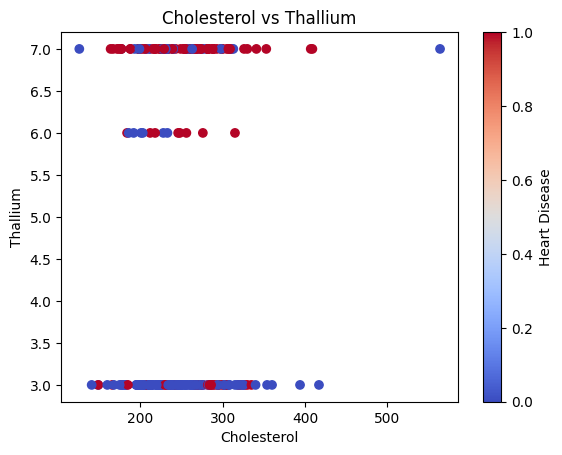

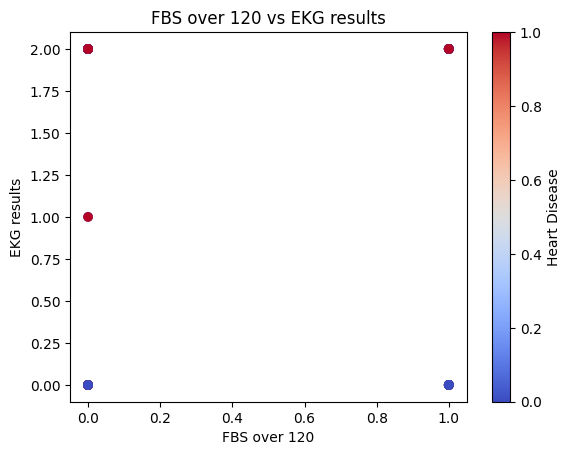

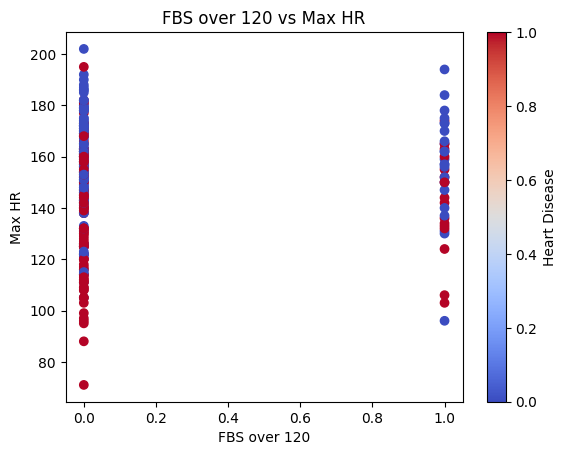

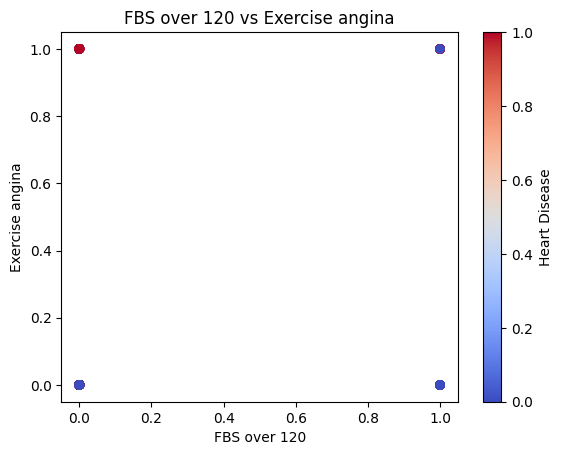

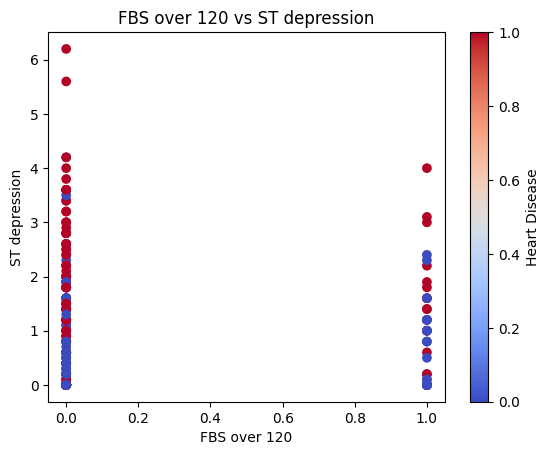

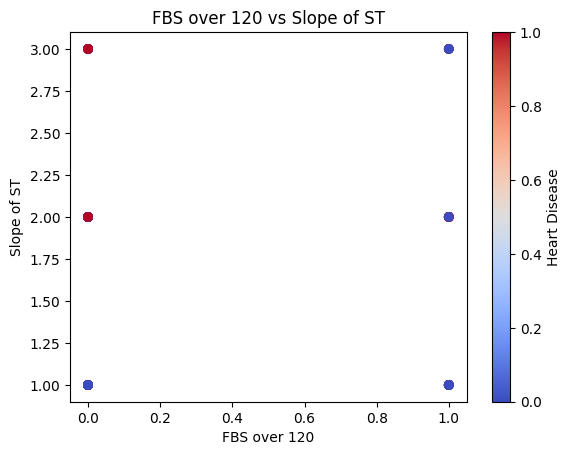

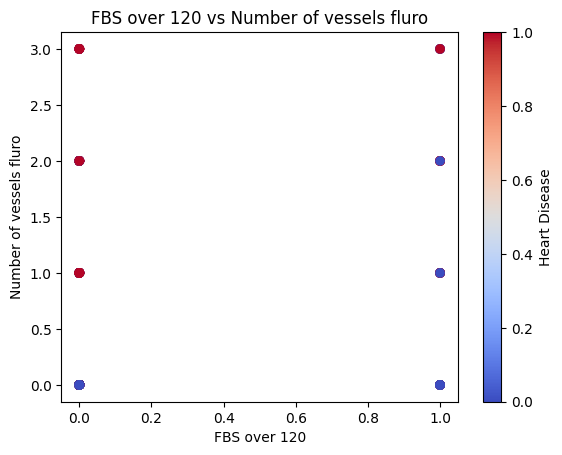

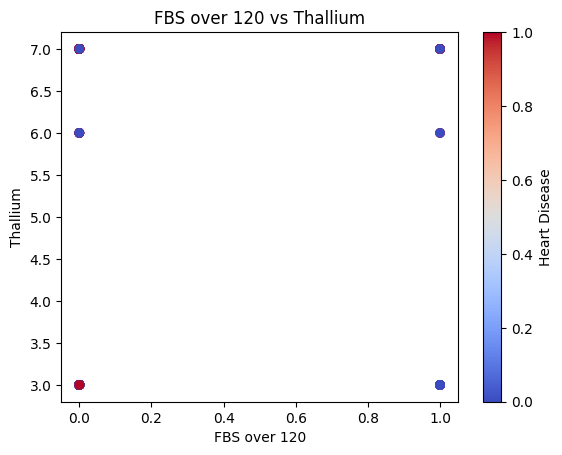

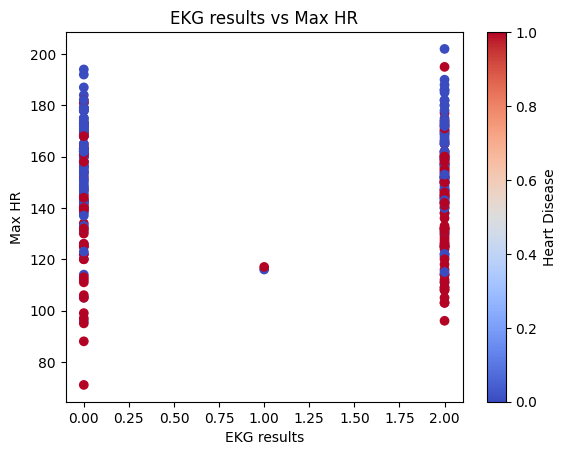

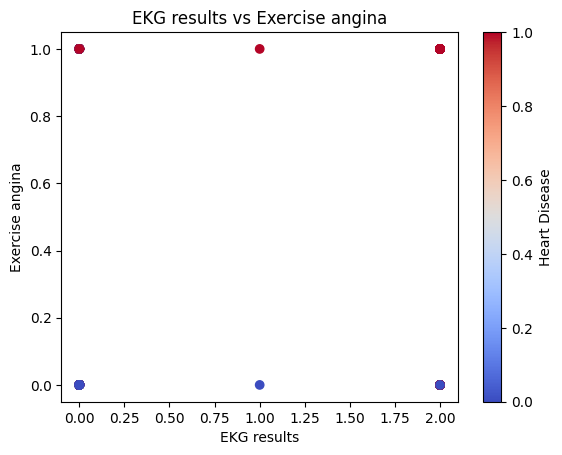

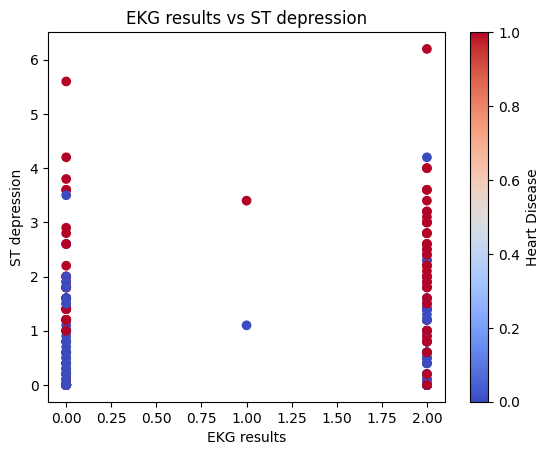

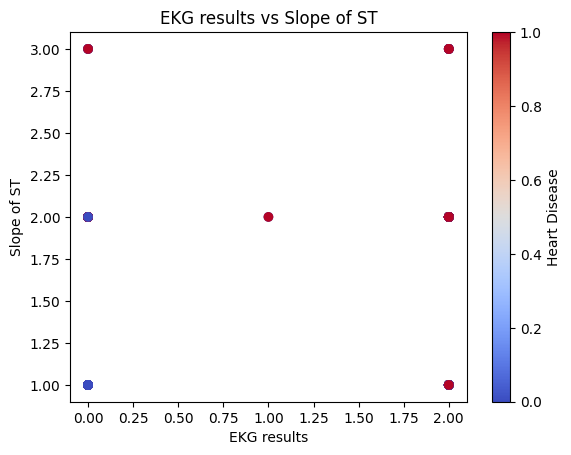

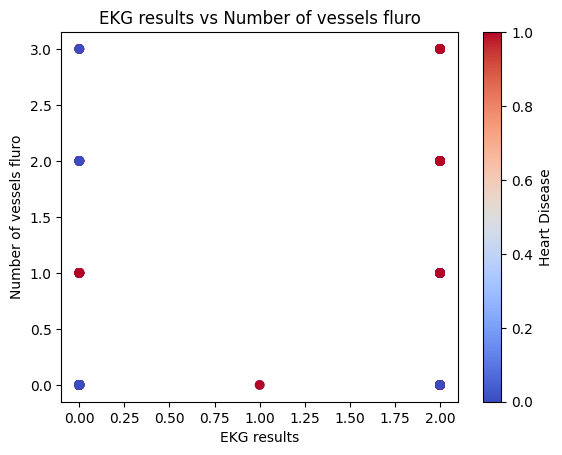

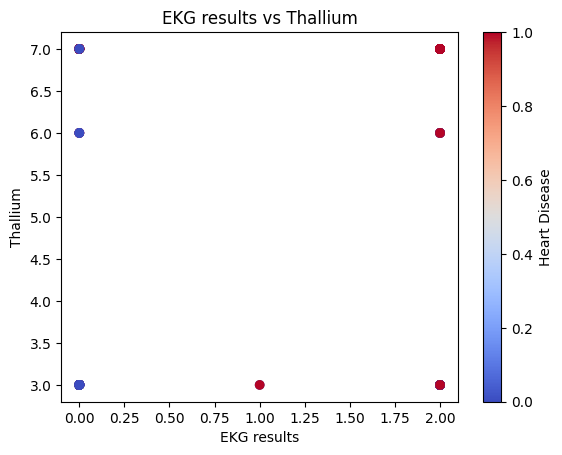

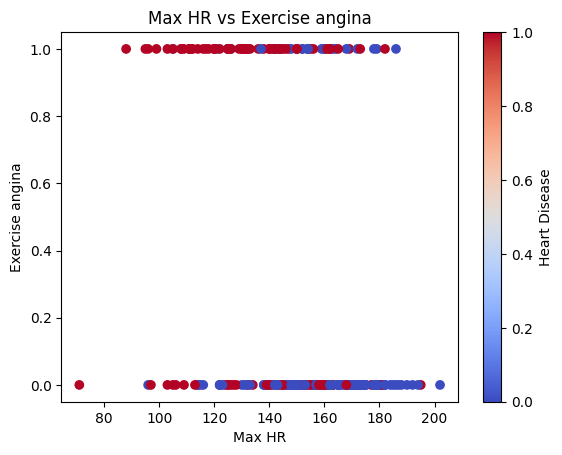

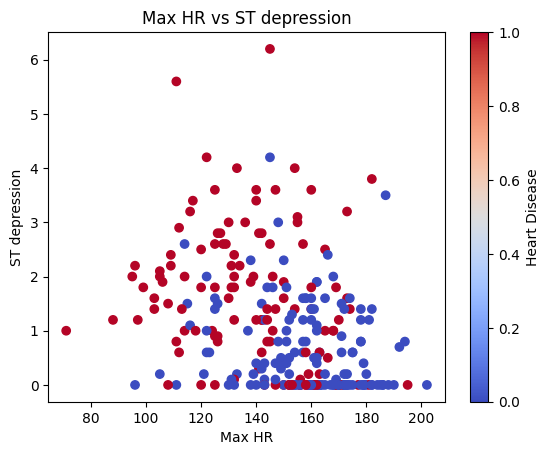

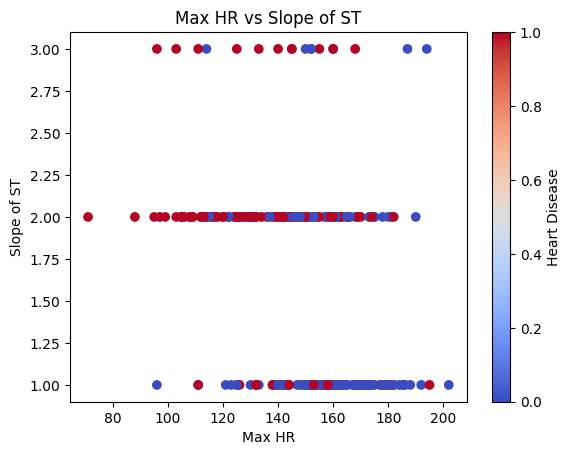

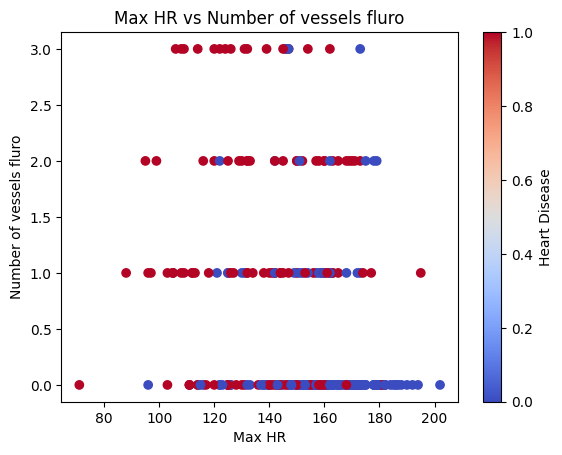

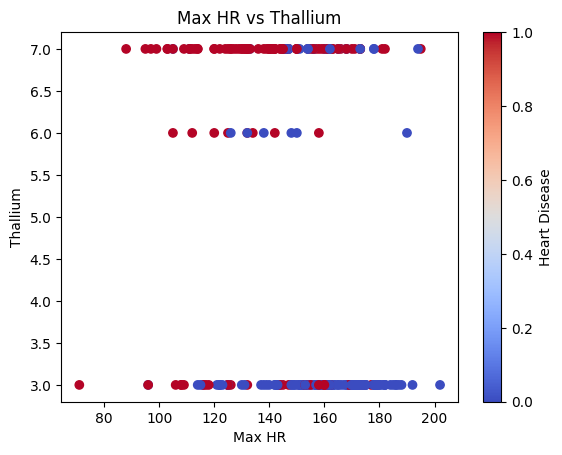

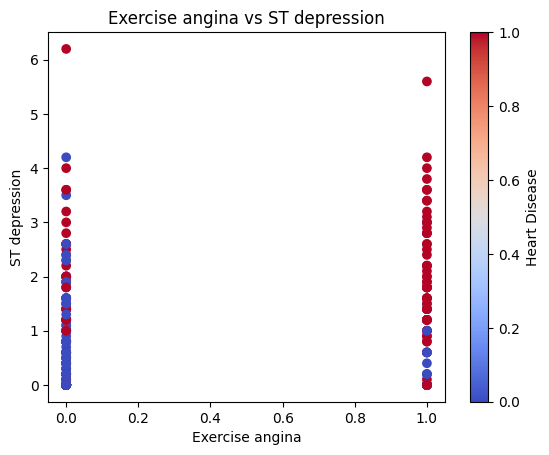

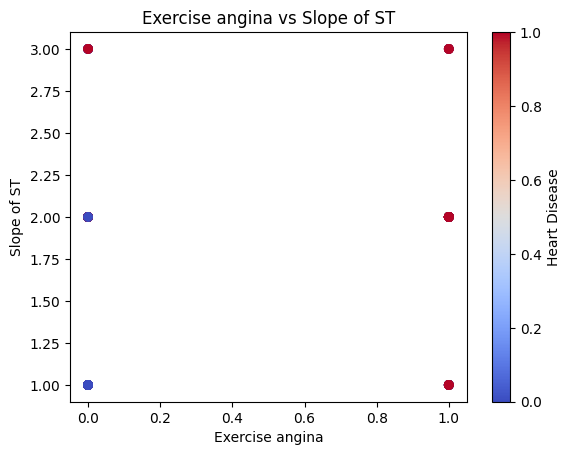

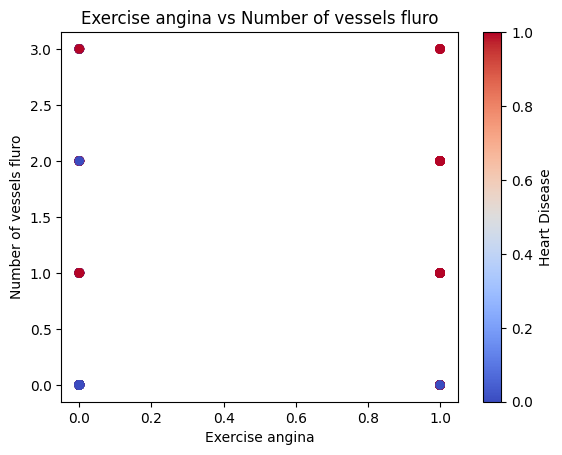

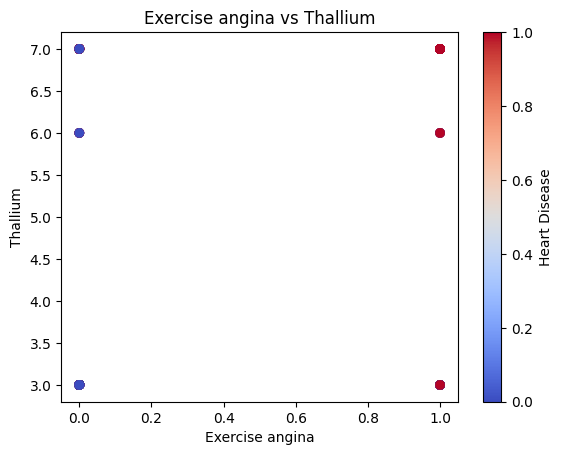

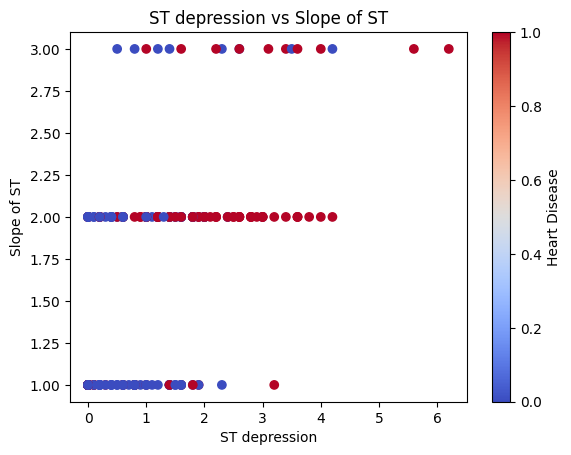

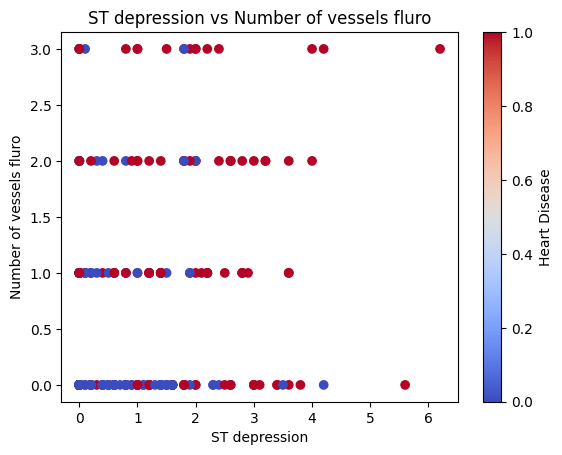

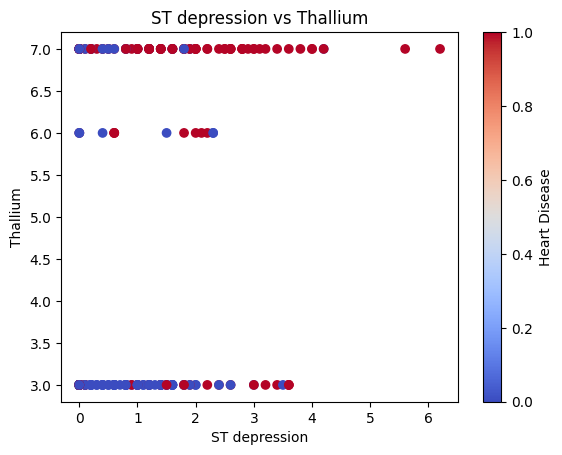

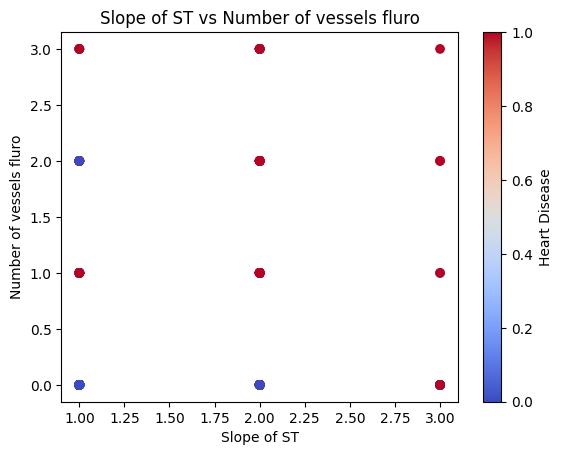

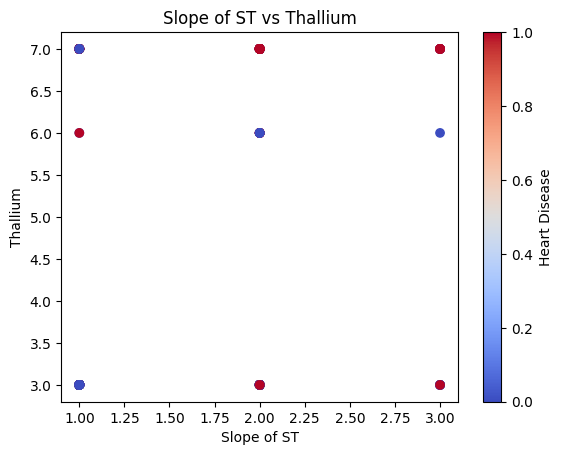

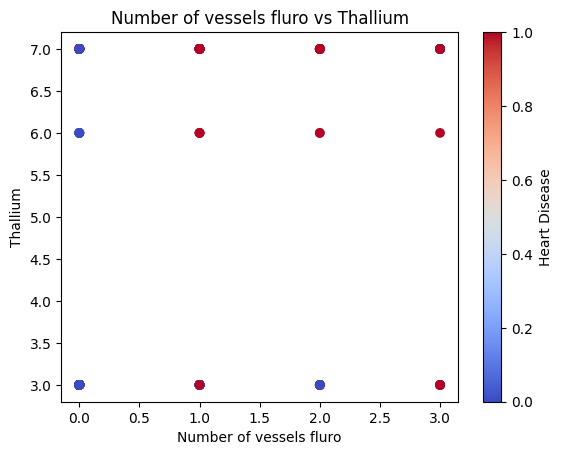

In [80]:
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        # Create a scatter plot
        plt.scatter(df[features[i]], df[features[j]], c=df[target], cmap='coolwarm')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'{features[i]} vs {features[j]}')
        plt.colorbar(label=target)
        plt.show()

# Visualize the data using box plot

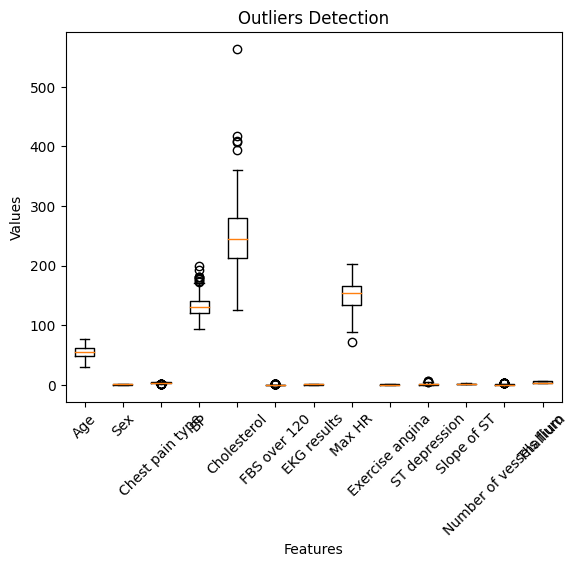

In [81]:
numerical_columns = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Create a box plot for all features
plt.boxplot(df[numerical_columns], labels=numerical_columns)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Outliers Detection')
plt.show()


# Data selection and preprocessing

In [82]:
# importing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures


In [83]:
# selecting the target and the features
x = np.array(df.drop(columns='Heart Disease'))
y = np.array(df['Heart Disease'])

In [84]:
# features scaling
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [85]:
x[0]

array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

In [88]:
# spliting the dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8)

In [89]:
# importing modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , r2_score

In [90]:
# build the model and fit it
clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8518518518518519

In [92]:
y_pred = clf.predict(x_test)

In [93]:
#check accuracy
accuracy_score(y_test,y_pred)

0.8518518518518519